# Exercise 5 – Numpy Basics
Here we get aquainted with Numpy.

In [3]:
# Set the plotting DPI settings to be a bit higher.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8.0, 5.0]
plt.rcParams['figure.dpi'] = 150

# Exercise 5
Here we will do a discounted cash flow calculation with Numpy.

#### Unfortunately Toby has messed up our code! Try and fix it and get it working.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Discounted Cash Flow Projection For INTC')

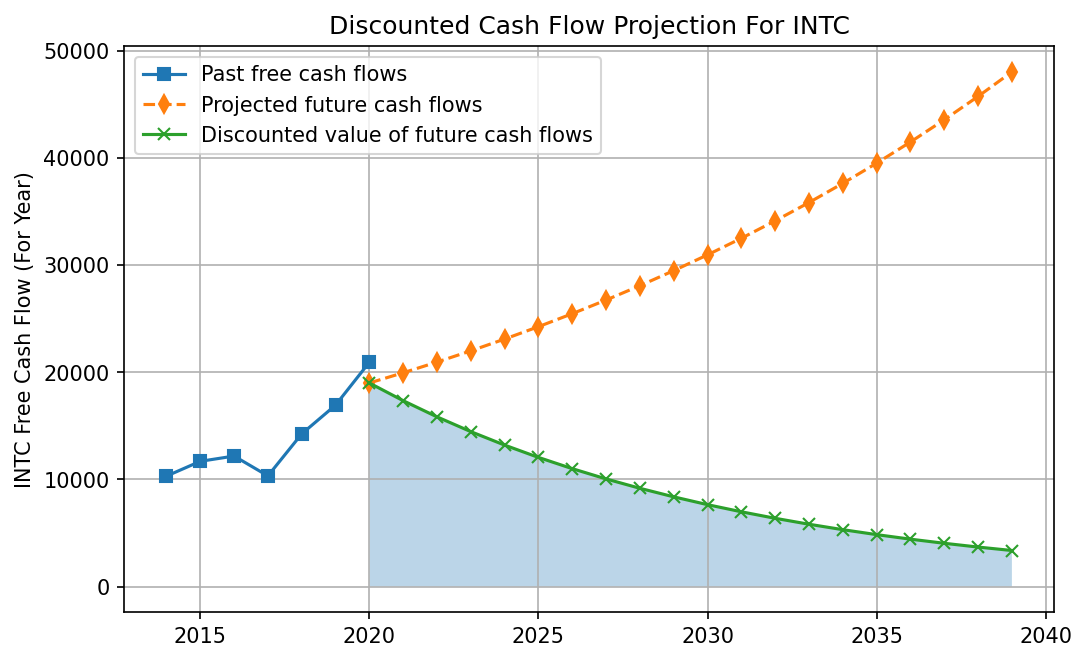

In [6]:
import numpy as np
from matplotlib import pyplot as plt

# Nice please to see cash flows is https://www.macrotrends.net/stocks/charts/INTC/intel/free-cash-flow

#Here is the rough cash flow data for the company. Values in millions
cashFlow_years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
freeCashFlow = [10313.00, 11692.00, 12183.00, 10332.00, 14251.00, 16932.00, 20931.00]#intc
freeCashFlowData = np.array([cashFlow_years, freeCashFlow])


def calcDCF(discRate, growthRate, currentFcf, numYears, startYear):
    '''
    Define a function that returns an array containing cash flow and 
    discounted cash flow for each future year.
    '''
    
    # Start zero arrays and fill the array with a loop.
    futureCashFlows = np.zeros(numYears)
    futureDiscCashFlows = np.zeros(numYears)
    
    # Now fill the array with a loop
    for i in range(0, numYears):
        futureCashFlows[i] = currentFcf * (growthRate+1) ** i
        futureDiscCashFlows[i] = futureCashFlows[i]/((1+discRate)**i)
    
    # Have an array for the future years, from say, 2020 to 2020 + numYears
    futureYears = np.array(range(startYear, startYear+numYears))
    
    # Return the arrays of: future cash flows
    # Future discounted Cash Flows
    # Future years that those cash flowws occur in
    return [futureCashFlows, futureDiscCashFlows, futureYears]




# Run the function
# Feel free to change the function arguments and see how they impact the valuation
[futureCashFlows, futureDiscCashFlows, futureYears] = calcDCF(discRate=0.15, 
                                                              growthRate=0.05, 
                                                              currentFcf=19000, 
                                                              numYears=20, 
                                                              startYear=2020)


# plot the past cash flows, future cash flows, 
# and discounted future cash flows on a graph.
plt.plot(freeCashFlowData[0,:], 
         freeCashFlowData[1,:], 
         '-s', 
         label='Past free cash flows')

plt.plot(futureYears, futureCashFlows, 
         '--d', label='Projected future cash flows')

plt.plot(futureYears, futureDiscCashFlows, 
         '-x', label='Discounted value of future cash flows')


plt.fill_between(futureYears, futureDiscCashFlows, 0, alpha=0.3)
#plt.ylim([0, 35])
plt.legend()
plt.grid()
plt.ylabel('INTC Free Cash Flow (For Year)')
plt.title('Discounted Cash Flow Projection For INTC')

In [9]:
# Print out the net present value of future cash flows.
print('The future value of discounted cash flows(the estimated company value) is:\n',
      round(futureDiscCashFlows.sum()/1000, 2),
      'Billion dollars')

The future value of discounted cash flows(the estimated company value) is:
 183.08 Billion dollars
